## Boosting and the AdaBoost Method

Boosting is a meta-algorithm since the method can be applied to many types of machine learning algorithms. In summary, boosting iteratively improves the learning of the N models by giving greater weight to training cases with larger errors. The basic boosting procedure is simple and follows these steps:
1. N learners (machine learning models) are defined.
2. Each of i training data cases is given an initial equal weight of 1/i.
3. The N learners are trained on the weighted training data cases.
4. The prediction is computed based on a aggregation of the learners; averaging over the hypothesis of the N learners. 
5. Weights for the training data cases are updated based on the aggregated errors made by the learners. Cases with larger errors are given larger weights. 
6. Steps 3, 4, and 5 are repeated until a convergence criteria is met.

**Classification and regression tree models** are the weak learners most commonly used with boosting.  AdaBoost uses some large number, N, tree models. The rate at which weights are updated is **adaptive** with the errors. 

It is important to keep in mind that boosted machine learning is not robust to significant noise or outliers in the training data. The reweighting process gives greater weight to the large errors, and therefore can give undue weight to outliers and errors. In cases where data is noisy, the random forest algorithm may prove to be more robust. 

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

In [10]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])

# Import the dataset from sklearn.datasets
iris = datasets.load_iris()

# Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

# Plot views of the iris data            
# plot_iris(iris) 

Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels =  np.array([levels[x] for x in iris['Species']])

# Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

In [11]:
## Define and fit an AdaBoosted tree model

nr.seed(1115)
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

# score the test data subset
X_test = scale.transform(X_test)
scores = ab_clf.predict(X_test)

In [12]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)    

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          35                0                 0
Actual Versicolor       0               32                 2
Actual Vriginica        0                3                28

Accuracy        0.95
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.91       0.93
Recall      1.00      0.94       0.90
F1          1.00      0.93       0.92


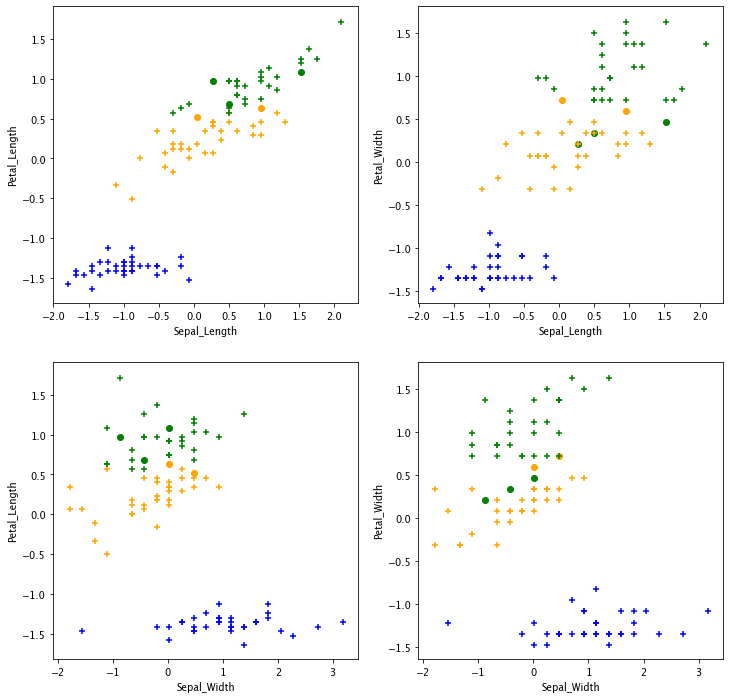

In [13]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

Text(0, 0.5, 'Feature importance')

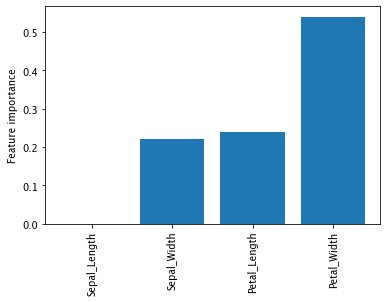

In [14]:
# Ada Boosted tree models have a nice property that feature importance is computed during model trainin
importance = ab_clf.feature_importances_
plt.bar(range(4), importance, tick_label = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

In [16]:
## Feature Selection
# Create reduced feature set
Features = np.array(iris[['Sepal_Width', 'Petal_Length', 'Petal_Width']])

# Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

nr.seed(1115)
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
scores = ab_clf.predict(X_test)
print_metrics_3(y_test, scores) 

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          35                0                 0
Actual Versicolor       0               32                 2
Actual Vriginica        0                3                28

Accuracy        0.95
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.91       0.93
Recall      1.00      0.94       0.90
F1          1.00      0.93       0.92


### Another Example

In [17]:
Features = np.array(pd.read_csv('Credit_Features.csv'))
Labels = np.array(pd.read_csv('Credit_Labels.csv'))
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

# Nested cross validation is used to estimate the optimal hyperparameters 
# and perform model selection for the AdaBoosted tree model
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

(1000, 35)
(1000,)


1. In this case, a grid of one hyperparameter is searched: 
  - learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators
2. There is a class imbalance and a difference in the cost to the bank of misclassification of a bad credit risk customer. This will be addressed later. 
3. The model is fit on each set of hyperparameters from the grid. 
4. The best estimated hyperparameters are printed. 

Notice that the model uses regularization rather than feature selection. The hyperparameter search is intended to optimize the level of regularization. 

In [18]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"learning_rate": [0.1, 1, 10]}
# Define the AdaBoosted tree model
nr.seed(3456)
ab_clf = AdaBoostClassifier()  

# Perform the grid search over the parameters
nr.seed(4455)
ab_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
ab_clf.fit(Features, Labels)
print(ab_clf.best_estimator_.learning_rate)

1


In [19]:
nr.seed(498)
cv_estimate = ms.cross_val_score(ab_clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.758
SDT of the metric       = 0.034
Outcomes by cv fold
Fold  1    0.765
Fold  2    0.721
Fold  3    0.704
Fold  4    0.736
Fold  5    0.788
Fold  6    0.772
Fold  7    0.728
Fold  8    0.827
Fold  9    0.765
Fold 10    0.771


In [20]:
## Build and test a model using the estimated optimal hyperparameters

nr.seed(1115)
index = range(Features.shape[0])
index = ms.train_test_split(index, test_size=300)
X_train = Features[index[0],:]
y_train = np.ravel(Labels[index[0]])
X_test = Features[index[1],:]
y_test = np.ravel(Labels[index[1]])

scale = preprocessing.StandardScaler()
scale.fit(X_train, y_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

nr.seed(1115)
ab_mod = AdaBoostClassifier(learning_rate=ab_clf.best_estimator_.learning_rate)
ab_mod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [25]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = ab_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.)

                 Confusion matrix
                 Score positive    Score negative
Actual positive         0               212
Actual negative         0                88

Accuracy        0.29
AUC             0.76
Macro precision 0.15
Macro recall    0.50
 
           Positive      Negative
Num case      212            88
Precision    0.00          0.29
Recall       0.00          1.00
F1           0.00          0.45


/Users/futongli/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall, these performance metrics are poor. The majority of negative cases have been misclassified as positive. Adaboosted methods are sensitive to class imbalance. 

It is likely that the poor performance arises from the class imbalance. Notice that there is no way to reweight classes with boosting methods. Some alternatives are:
1. **Impute** new values using a statistical algorithm. 
2. **Undersample** the majority cases. For this method a number of the cases equal to the minority case are Bernoulli sampled from the majority case. 
3. **Oversample** the minority cases. For this method the number of minority cases are resampled until they equal the number of majority cases.

In [27]:
## Undersample the majority cases

temp_Labels_1 = Labels[Labels == 1]  # Save these
temp_Features_1 = Features[Labels == 1, :]  # Save these
temp_Labels_0 = Labels[Labels == 0]  # Undersample these
temp_Features_0 = Features[Labels == 0, :]  # Undersmaple these

indx = nr.choice(temp_Features_0.shape[0], temp_Features_1.shape[0], replace=True)

print(indx)

temp_Features = np.concatenate((temp_Features_1, temp_Features_0[indx,:]), axis = 0)
temp_Labels = np.concatenate((temp_Labels_1, temp_Labels_0[indx,]), axis = 0) 

print(np.bincount(temp_Labels))
print(temp_Features.shape)
print(temp_Labels.shape)


[ 36 439  74 160 537 471 617  69 604 118 257 381 234  76 163 316 211 606
 653 404 154 405 586 623 507 451 492  77 387 458 418 408 426 454 236  22
 184  40 418 222 190 368 567 223 309 422  22 169 160 364 496 390 144 603
 309 316 510 102 624 537 316 263 419 687 495 504 686  25 140 570 265 654
 263 211 366 362 163 514 141 582 110 662  34 237 427 614 293 687 493 525
 639 524 325 245  30 339 237 484  70  80 399  60 626 285 661 169 535 157
 364 696 642 299 238 434 421 366 235 675 198 251 665 258 378 360 460 382
 386 458 202 106 310 366  53 221  13 359 308 593 273 405 593 371 144 652
 343 545 378 631 170 214 204   2 404 483 415 273 490 185 192 389 641 361
 273 249 497 517  43  94 273 585 532 149 334 217 263 597 241 130 192 499
 188 194  41 525 291 543 535 523  96  33 632 188 248 301 158   5 440 605
   0 482 623 445 232 351  97 112 208 540 127 482 180  79 342 257 200 242
 195  13 213 336  56 511 165 357 263 298 448 124 239 541 366 553 657 354
 188 435 171 518 219 582 550 669 287 670 463 529  1

In [32]:
## Perform model selection and evaluation using nested cross validation

nr.seed(1234)
inside = ms.KFold(n_splits=10, shuffle=True)
nr.seed(4321)
outside = ms.KFold(n_splits=10, shuffle=True)

# Define an AdaBoost Tree
nr.seed(3456)
ab_clf = AdaBoostClassifier()

# Perform a grid search
nr.seed(4455)
ab_clf = ms.GridSearchCV(estimator=ab_clf, param_grid=param_grid,
                        cv=inside,
                        scoring='roc_auc',
                        return_train_score=True)
ab_clf.fit(temp_Features, temp_Labels)
print(ab_clf.best_estimator_.learning_rate)

0.1


In [33]:
nr.seed(498)

cv_estimate = ms.cross_val_score(ab_clf, Features, Labels,
                                cv=outside)

print(cv_estimate)
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

[0.7645865  0.72123016 0.70352782 0.73582418 0.78819444 0.7718227
 0.72794118 0.82693394 0.76455301 0.77137042]
Mean performance metric = 0.758
SDT of the metric       = 0.034
Fold  1    0.765
Fold  2    0.721
Fold  3    0.704
Fold  4    0.736
Fold  5    0.788
Fold  6    0.772
Fold  7    0.728
Fold  8    0.827
Fold  9    0.765
Fold 10    0.771


In [35]:
## Train and evaluate a model with the balanced cases and the update hyperparameter.

nr.seed(1115)
index = range(Features.shape[0])
index = ms.train_test_split(index, test_size=300)
X_train = Features[index[0],:]
y_train = Labels[index[0]]
X_test = Features[index[1], :]
y_test = Labels[index[1]]

## Undersample the majority case for the training data
temp_Features_1 = X_train[y_train == 1, :]
temp_Labels_1 = y_train[y_train == 1]
temp_Features_0 = X_train[y_train == 0, :]
temp_Labels_0 = y_train[y_train == 0]

index = nr.choice(temp_Features_0.shape[0], temp_Features_1.shape[0], replace=True)

X_train = np.concatenate((temp_Features_1, temp_Features_0[index, :]), axis=0)
y_train = np.concatenate((temp_Labels_1, temp_Labels_0[index]), axis=0)

print(np.bincount(y_train))
print(X_train.shape)
print(y_train.shape)

[212 212]
(424, 35)
(424,)


In [37]:
## Define and fit the model
ab_mod = AdaBoostClassifier(learning_rate=ab_clf.best_estimator_.learning_rate)
ab_mod.fit(X_train, y_train)

# Prediction
probabilities = ab_mod.predict_probs(X_test)
print_metrics(y_test, probabilities, 0,5)

AttributeError: 'AdaBoostClassifier' object has no attribute 'predict_probs'

In [ ]:
90